In [1]:
import pandas as pd
import sqlite3

- analyze only the users and not the admins
- the fontsize and the figsize remain the same
- for each hour, calculate the average number of commits on working days and on
weekends (if there were no commits in an hour, do not use it to calculate the
average) use these values for your graph, for example: Mon, 17-18: 5 commits, Tue,
17-18: 6 commits, Wed, 17-18: 7 commits
- choose a palette that you really enjoy, you do not have to replicate it from the graph
above
- at the end of your Jupyter Notebook, create a markdown cell and insert the question

    - “Is the dynamic different on working days and weekends?”, for the answer
    include the hour when the number of commits is the largest during working days and the hour when it is the largest during the weekend.

In [104]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [97]:
df = pd.io.sql.read_sql(
    """
    SELECT
        day_type,
        hour,
        AVG(count_of_commits) AS avg
    FROM (SELECT
        strftime('%d', timestamp) AS day_num,
        strftime('%H', timestamp) AS hour,
        CASE
            WHEN strftime('%w', timestamp) IN('0', '6') THEN 'weekend'
            ELSE 'workday'
        END AS day_type,
        COUNT(*) AS count_of_commits
    FROM checker 
    WHERE uid LIKE 'user_%'
    GROUP BY 1, 2, 3) t
    GROUP BY 1, 2
    """, 
    conn)

In [98]:
df_pivot = pd.pivot_table(df, values='avg', index=['hour'],
               columns=['day_type'], fill_value=0)
df_pivot

day_type,weekend,workday
hour,,
00,2.000000,3.000000
01,6.000000,0.000000
03,1.000000,2.000000
05,2.000000,7.500000
06,0.000000,1.500000
07,4.000000,5.166667
08,7.000000,3.700000
09,3.666667,6.000000
10,7.000000,13.200000


array([<Axes: title={'center': 'weekend'}, xlabel='hour'>,
       <Axes: title={'center': 'workday'}, xlabel='hour'>], dtype=object)

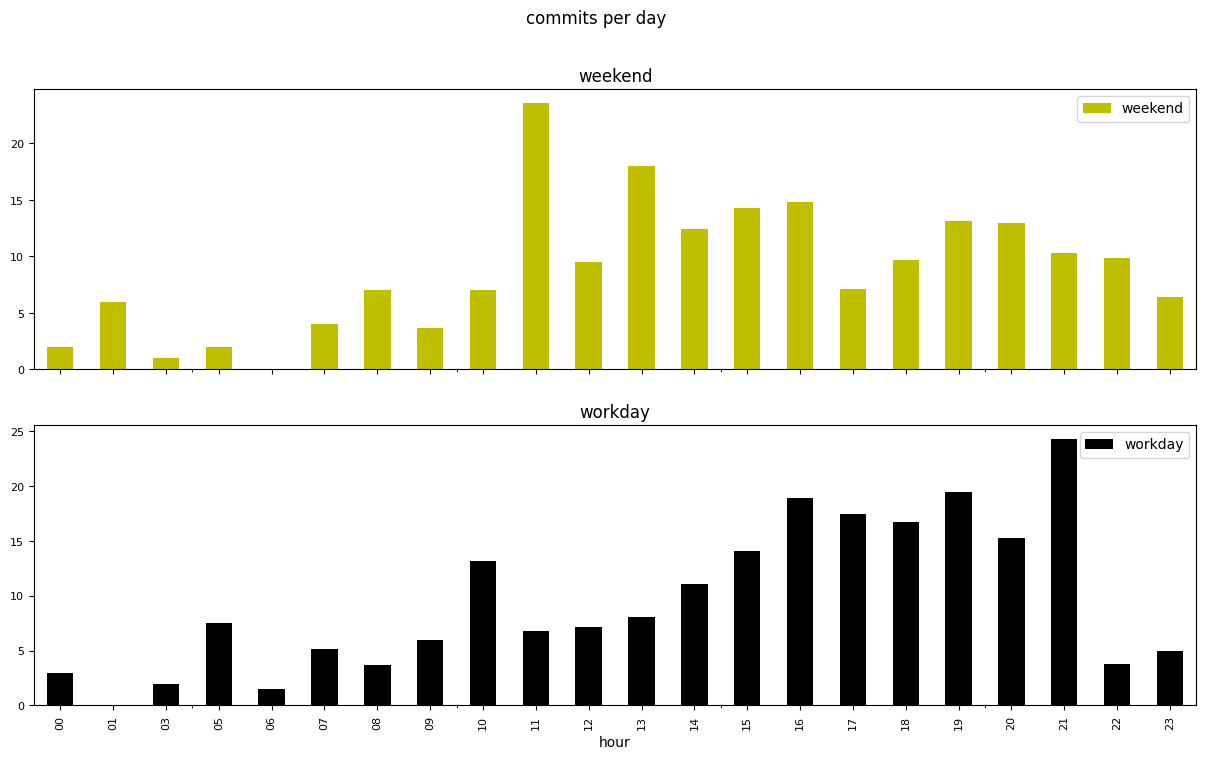

In [102]:
df_pivot.plot(kind='bar', 
        title='commits per day',
        rot=90, 
        figsize=(15, 8), 
        fontsize=8,
        color=['y', 'black'],
        subplots=True)

In [106]:
conn.close()

“Is the dynamic different on working days and weekends?”, for the answer
    include the hour when the number of commits is the largest during working days and the hour when it is the largest during the weekend. 
     
ANSWER: 
- weekend 11  
- workday 21